# Box Office Analysis 

## 1. Business Understanding

### Introduction

Microsoft is a company that ...

### Problem Statement 

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

> **Problem Statement:** You want to understand what types of films are currently doing their best at the box office.

### b) Defining the Metric for Success

### c) Understanding the context 

### d) Recording the Experimental Design

### e) Data Relevance

## 2. Reading the Data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


In [2]:
# Loading project data into pandas DataFrames 
df_bom_gross = pd.read_csv('bom.movie_gross.csv.gz')
df_imdb_ratings = pd.read_csv('imdb.title.ratings.csv.gz')
df_imdb_basics = pd.read_csv('imdb.title.basics.csv.gz')
df_tn_movie_budgets = pd.read_csv('tn.movie_budgets.csv.gz')
df_tmdb_movies = pd.read_csv('tmdb.movies.csv.gz')



## 3. Understanding the data

Let's begin by understanding the shape of our dataframes

In [3]:
#Viewing the shape 
print ("Number of records in df_bom_gross: ", df_bom_gross.shape[0], ". It has", df_bom_gross.shape[1], "columns")
print ("Number of records in df_imdb_ratings: ", df_imdb_ratings.shape[0], ". It has", df_imdb_ratings.shape[1], "columns")
print ("Number of records in df_imdb_basics: ", df_imdb_basics.shape[0], ". It has", df_imdb_basics.shape[1], "columns")
print ("Number of records in df_tn_movie_budgets: ", df_tn_movie_budgets.shape[0], ". It has", df_tn_movie_budgets.shape[1], "columns")
print ("Number of records in df_tmdb_movies: ", df_tmdb_movies.shape[0], ". It has", df_tmdb_movies.shape[1], "columns")


Number of records in df_bom_gross:  3387 . It has 5 columns
Number of records in df_imdb_ratings:  73856 . It has 3 columns
Number of records in df_imdb_basics:  146144 . It has 6 columns
Number of records in df_tn_movie_budgets:  5782 . It has 6 columns
Number of records in df_tmdb_movies:  26517 . It has 10 columns


Now let's take a look at the first five rows of each data frame

In [4]:
display (df_bom_gross.head())
display (df_imdb_ratings.head())
display (df_imdb_basics.head())
display (df_tn_movie_budgets.head())
display (df_tmdb_movies.head())

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


Let's get a summary of the information in our dataframes

In [5]:
# Getting a summary of the dataframes
print (df_bom_gross.info())
print ("\n")

print (df_imdb_ratings.info())
print ("\n")

print (df_imdb_basics.info())
print ("\n")

print (df_tn_movie_budgets.info())
print ("\n")

print (df_tmdb_movies.info())
print ("\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 

Lets Look at the last three rows in each dataframe

In [6]:
# Previewing the bottom of our dataset
display (df_bom_gross.tail(3))
display (df_imdb_ratings.tail(3))
display (df_imdb_basics.tail(3))
display (df_tn_movie_budgets.tail(3))
display (df_tmdb_movies.tail(3))

,title,studio,domestic_gross,foreign_gross,year
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


,tconst,averagerating,numvotes
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5
73855,tt9894098,6.3,128


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.6,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.6,2018-06-22,Trailer Made,0.0,1
26516,26516,"[53, 27]",309885,en,The Church,0.6,2018-10-05,The Church,0.0,1


Let's tale a look at the numerical entries in the dataframe 

In [7]:
# Checking whether each column has an appropriate datatype
display (df_bom_gross.describe())
display (df_imdb_ratings.describe())
display (df_imdb_basics.describe())
display (df_tn_movie_budgets.describe())
display (df_tmdb_movies.describe())

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


,Unnamed: 0,id,popularity,vote_average,vote_count
count,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,5.991281,194.224837
std,7654.94288,153661.615648,4.355229,1.852946,960.961095
min,0.00000,27.000000,0.600000,0.000000,1.000000
25%,6629.00000,157851.000000,0.600000,5.000000,2.000000
50%,13258.00000,309581.000000,1.374000,6.000000,5.000000
75%,19887.00000,419542.000000,3.694000,7.000000,28.000000
max,26516.00000,608444.000000,80.773000,10.000000,22186.000000


## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

### a.Validation

## 5. Data cleaning 

## MISSING VALUES 

Now that we have a better understanding of what our data is looking like, we can proceed to cleaning it. Let's begin by identifying missing values.

In [8]:
#identifying missing values in each df 
print ("Missing values in df_bom_gross:\n")
print (df_bom_gross.isnull().sum())
print ("\n")

print ("Missing values in df_imdb_ratings:\n") 
print(df_imdb_ratings.isnull().sum())
print ("\n")

print ("Missing values in df_imdb_basics:\n") 
print(df_imdb_basics.isnull().sum())
print ("\n")

print ("Missing values in df_tn_movie_budgets:\n") 
print (df_tn_movie_budgets.isnull().sum())
print ("\n")

print ("Missing values in df_tmdb_movies:\n") 
print(df_tmdb_movies.isnull().sum())
print ("\n")


Missing values in df_bom_gross:

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64


Missing values in df_imdb_ratings:

tconst           0
averagerating    0
numvotes         0
dtype: int64


Missing values in df_imdb_basics:

tconst                 0
primary_title          1
original_title        22
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64


Missing values in df_tn_movie_budgets:

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64


Missing values in df_tmdb_movies:

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64




# Dealing with missing values 


## DF_BOM_GROSS

In [9]:
#Dealing with missing values in df_bom_gross
#Dropping the foreign_gross column because the missing values are about 40% of the total values in the column
df_bom_gross = df_bom_gross.drop(columns=['foreign_gross'])

#Replacing missing values in domestic_gross column
df_bom_gross['domestic_gross'] = df_bom_gross['domestic_gross'].fillna(df_bom_gross['domestic_gross'].median())

#Replacing missing values in studio column with unknwon because it is categorical not numeric
df_bom_gross['studio'] = df_bom_gross['studio'].fillna('Unknown')

#CHECKING FOR ANY REMAINING MISSING VALUES
print ("Missing values in df_bom_gross:\n")
print (df_bom_gross.isnull().sum())
 
display (df_bom_gross)


Missing values in df_bom_gross:

title             0
studio            0
domestic_gross    0
year              0
dtype: int64


,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010
...,...,...,...,...
3382,The Quake,Magn.,6200.0,2018
3383,Edward II (2018 re-release),FM,4800.0,2018
3384,El Pacto,Sony,2500.0,2018
3385,The Swan,Synergetic,2400.0,2018


## DF_IMDB_BASICS

In [10]:
#Dealing with missing values in df_imdb_basics

#Dropping rows that contain NaN values in 'original_title'
df_imdb_basics = df_imdb_basics.dropna(subset=['original_title'])

#Categorizing runtime minutes 
bins = [0, 60, 120, 180, np.inf]
names = ['IH', '1-2H', '2-3H', '3H+']

df_imdb_basics['runtime_category'] = pd.cut(df_imdb_basics['runtime_minutes'], bins, labels=names)
df_imdb_basics['runtime_category'] = df_imdb_basics['runtime_category'].cat.add_categories(['Unknown'])
df_imdb_basics['runtime_category'].fillna('Unknown', inplace = True)

#Dropping the runtime_minutes column 
df_imdb_basics = df_imdb_basics.drop('runtime_minutes', axis =1)

#Dropping rows with missing values in genre column
df_imdb_basics = df_imdb_basics.dropna (subset=['genres'])

#CHECKING FOR ANY REMAINING MISSING VALUES
print ("Missing values in df_imdb_basics:\n")
print (df_imdb_basics.isnull().sum())

display (df_imdb_basics)

Missing values in df_imdb_basics:

tconst              0
primary_title       0
original_title      0
start_year          0
genres              0
runtime_category    0
dtype: int64


,tconst,primary_title,original_title,start_year,genres,runtime_category
0,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",2-3H
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,"Biography,Drama",1-2H
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,Drama,2-3H
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,"Comedy,Drama",Unknown
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,"Comedy,Drama,Fantasy",1-2H
...,...,...,...,...,...,...
146138,tt9916428,The Secret of China,The Secret of China,2019,"Adventure,History,War",Unknown
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,Drama,2-3H
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,Documentary,Unknown
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,Comedy,Unknown


Merging the two imdb dataframes for easier analysis on the 'tconst' column 

In [11]:
# Merging df_imdb_basics and df_imdb_ratings on 'tconst'
df_imdb = df_imdb_basics.merge(df_imdb_ratings, on='tconst', how='inner')
display (df_imdb)

,tconst,primary_title,original_title,start_year,genres,runtime_category,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",2-3H,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,"Biography,Drama",1-2H,7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,Drama,2-3H,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,"Comedy,Drama",Unknown,6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,"Comedy,Drama,Fantasy",1-2H,6.5,119
...,...,...,...,...,...,...,...,...
73047,tt9913056,Swarm Season,Swarm Season,2019,Documentary,1-2H,6.2,5
73048,tt9913084,Diabolik sono io,Diabolik sono io,2019,Documentary,1-2H,6.2,6
73049,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,"Drama,Family",1-2H,8.7,136
73050,tt9914642,Albatross,Albatross,2017,Documentary,Unknown,8.5,8


## DF_TN_MOVIE_BUDGETS

In [12]:
#Converting column in df_tn_movie_budgets dataframe from string to numeric format 

df_tn_movie_budgets ['production_budget'] = df_tn_movie_budgets ['production_budget'].str.replace('\$|,', '', regex=True).astype(float).astype(int)
df_tn_movie_budgets['domestic_gross'] = df_tn_movie_budgets['domestic_gross'].str.replace('\$|,', '', regex=True).astype(float).astype(int)
df_tn_movie_budgets['worldwide_gross'] = df_tn_movie_budgets['worldwide_gross'].str.replace('\$|,', '', regex=True).astype(float).astype(int)



In [13]:
display (df_tn_movie_budgets.head())
display (df_tn_movie_budgets.describe())

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,-2147483648
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


,id,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,3.158776e+07,4.187333e+07,8.988256e+07
std,28.821076,4.181208e+07,6.824060e+07,1.738874e+08
min,1.000000,1.100000e+03,0.000000e+00,-2.147484e+09
25%,25.000000,5.000000e+06,1.429534e+06,4.102274e+06
50%,50.000000,1.700000e+07,1.722594e+07,2.794748e+07
75%,75.000000,4.000000e+07,5.234866e+07,9.758278e+07
max,100.000000,4.250000e+08,9.366622e+08,2.053311e+09


In [26]:
# Remove rows where 'worldwide_gross' is less than 0
df_tn_movie_budgets = df_tn_movie_budgets[df_tn_movie_budgets['worldwide_gross'] >= 0]


In [ ]:
#Calculating the profitability of the movies in order to compare how production budgets influence profitability 


In [ ]:
# Dealing with the Missing Data
#

In [ ]:
# More data cleaning procedures
#

## 6. Data Analysis

Let's look into the first insight. How does the runtime of a movie affect its profitability? Remember that we grouped our runtime data into different categories earlier to easily visualize the information. 

In [ ]:
# Ploting the bivariate summaries and recording our observations
#

In [ ]:
# Data Reduction
#

Lets analyze the relationship between runtime_category and averagerating in df_imdb to understand how the length of a movie affects its popularity among users.

In [ ]:
# # Group the dataframe by 'runtime_category' and calculate the mean of 'averagerating'
# df_imdb_runtime_rating = df_imdb.groupby('runtime_category')['averagerating'].mean()

# # Create a bar plot
# plt.figure(figsize=(10, 6))
# df_imdb_runtime_rating.plot(kind='bar', color='blue')
# plt.title('Average Rating by Runtime Category')
# plt.xlabel('Runtime Category')
# plt.ylabel('Average Rating')
# plt.xticks(rotation=45)
# plt.show()


## Which genres have the highest ratings?

<Axes: xlabel='genres'>

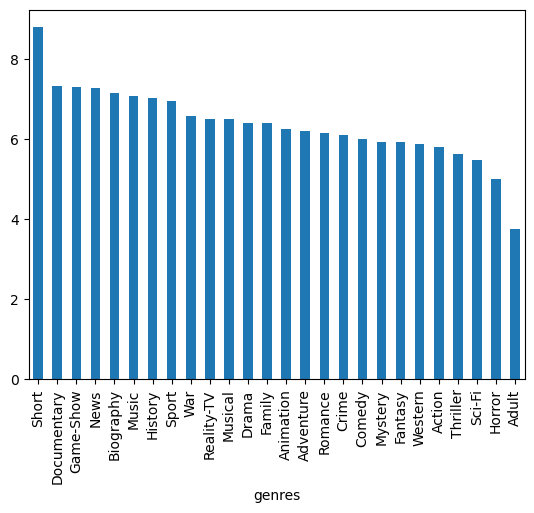

In [14]:
#Splittiing the genres into seperate rows where they are separated by commas
df_imdb['genres'] = df_imdb['genres'].str.split(',')
df_imdb = df_imdb.explode('genres')

#Calculating the average ratings for each genre 
genre_ratings = df_imdb.groupby('genres')['averagerating'].mean()

#Plot the data
genre_ratings.sort_values(ascending=False).plot(kind='bar')


## How does the length of a movie correspond to its average rating 

<Axes: xlabel='runtime_category'>

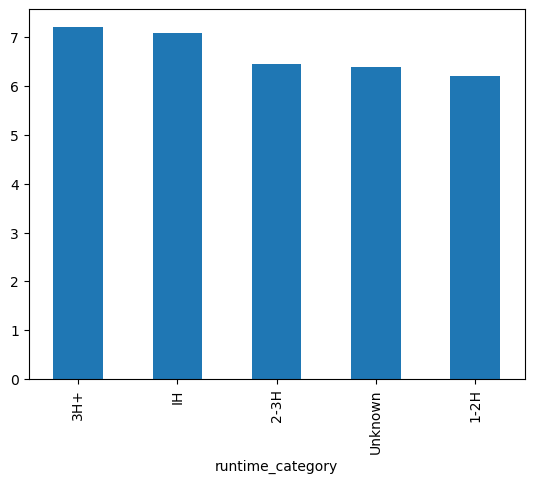

In [22]:
runtime_ratings = df_imdb.groupby('runtime_category')['averagerating'].mean()


#Plotting the data
runtime_ratings.sort_values(ascending=False).plot(kind='bar')

## Production Budget vs Domestic Gross

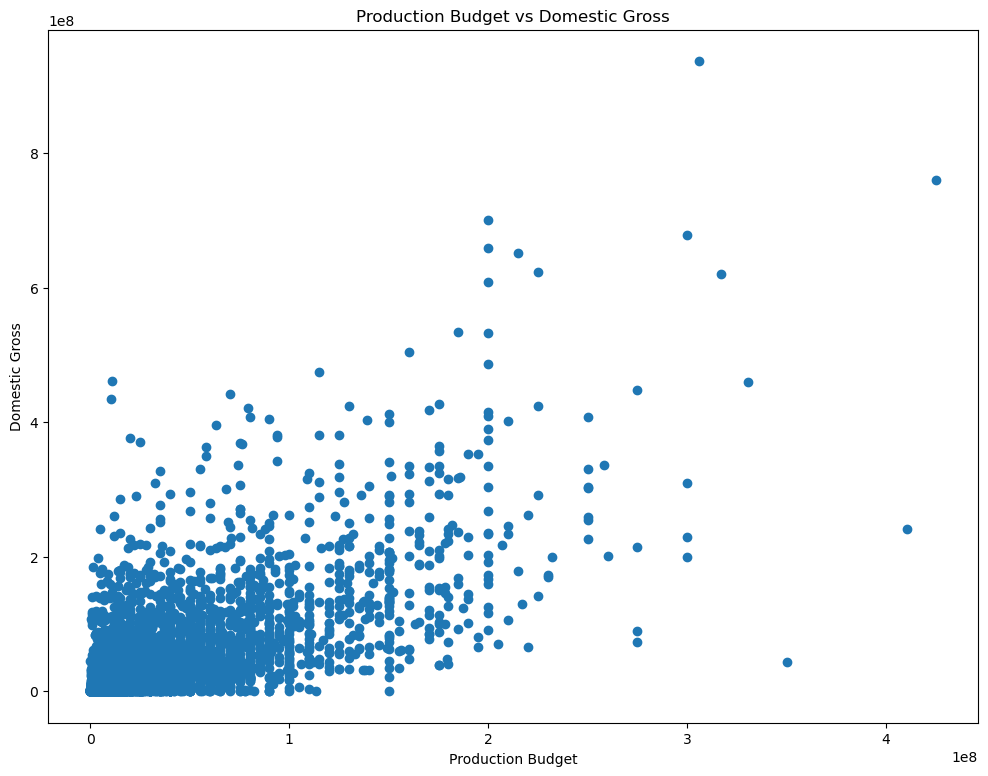

In [21]:
#Plotting the data to view the relationships in df_tn_movie_budgets
plt.figure(figsize=(12,9))
plt.scatter(df_tn_movie_budgets['production_budget'], df_tn_movie_budgets['domestic_gross'])
plt.title('Production Budget vs Domestic Gross')
plt.xlabel('Production Budget')
plt.ylabel('Domestic Gross')
plt.show()

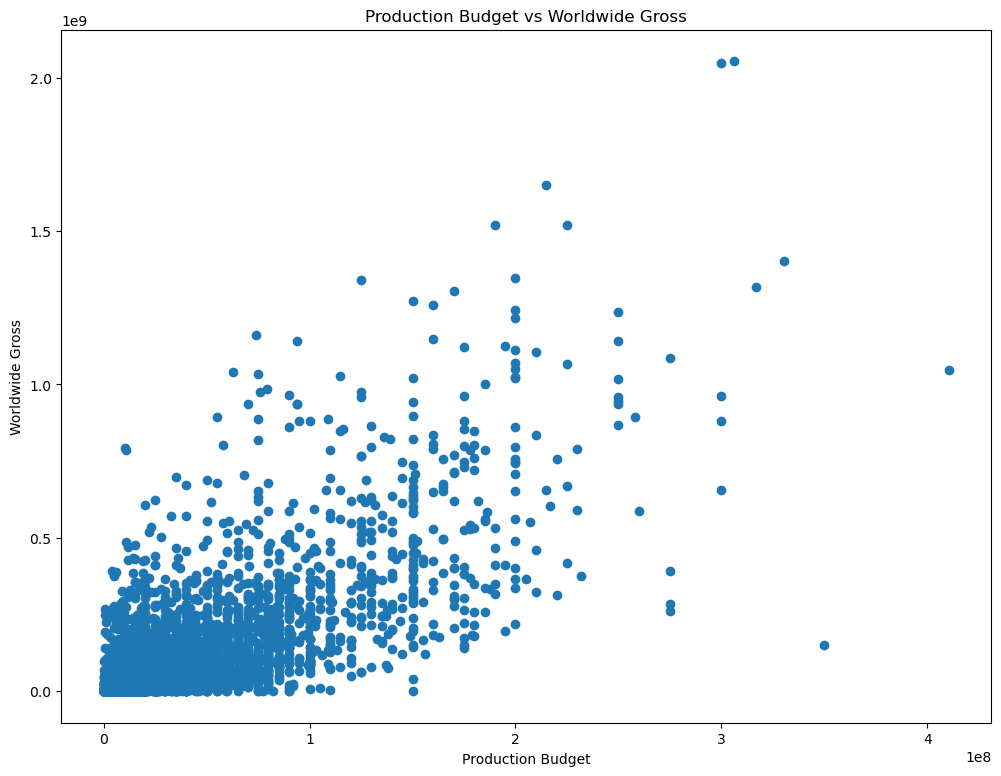

In [28]:
# Production Budget vs Worldwide Gross
plt.figure(figsize=(12,9))
plt.scatter(df_tn_movie_budgets['production_budget'], df_tn_movie_budgets['worldwide_gross'])
plt.title('Production Budget vs Worldwide Gross')
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.show()


Understanding how the production budget affects net earnings

## 7. Findings and visuals 

In [ ]:
# Reporting the findings 
# 

In [ ]:
display (df_bom_gross.head())
display (df_imdb.head())
display (df_tn_movie_budgets.head())
display (df_tmdb_movies.head())

## 9. Business Recommendation

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.

